In [2]:
# --- Imports ---
import sys,os
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt 
import struct
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import uniform
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import ticker
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import math
from geopandas import GeoDataFrame, GeoSeries
import geopandas as gpd
from shapely.geometry import Polygon, Point, LineString
from descartes import PolygonPatch
from matplotlib.collections import PatchCollection
import shapely
import datetime
%matplotlib inline

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [ ]:
plt.get_cmap("inferno")

In [290]:
#mons = pd.read_csv('./data/pokemon.csv', skiprows=1, usecols=[3,4,5,6], names=["num", "lat", "lng", "time"], low_memory=False)

mons = pd.read_csv('./data/backup.csv', usecols=[1,2,4,5], names=["num","time", "lat", "lng"], low_memory=False)

mons.last_valid_index()

5181909

In [291]:
times = mons['time'].map(lambda x: datetime.datetime.utcfromtimestamp(x))
times

0         2016-07-18 21:53:38
1         2016-07-23 00:52:56
2         2016-07-23 00:57:45
3         2016-07-23 00:54:28
4         2016-07-23 00:51:48
5         2016-07-23 00:49:25
6         2016-07-23 01:02:00
7         2016-07-23 00:51:36
8         2016-07-23 00:58:55
9         2016-07-23 00:49:51
10        2016-07-23 00:57:16
11        2016-07-23 00:54:15
12        2016-07-23 00:51:42
13        2016-07-23 00:56:06
14        2016-07-23 01:01:08
15        2016-07-18 21:53:38
16        2016-07-23 00:48:12
17        2016-07-23 00:51:40
18        2016-07-23 00:54:34
19        2016-07-23 00:56:15
20        2016-07-23 00:53:05
21        2016-07-23 01:01:17
22        2016-07-23 00:51:28
23        2016-07-23 00:59:00
24        2016-07-23 00:52:04
25        2016-07-23 00:56:54
26        2016-07-23 00:56:55
27        2016-07-23 00:59:14
28        2016-07-23 00:48:34
29        2016-07-23 00:48:23
                  ...        
5181880   2016-07-18 21:53:37
5181881   2016-07-18 21:53:35
5181882   

In [ ]:
hours = times.map(lambda x: x.hour)
mins = times.map(lambda x: x.minute)
hourstamp = times.map(lambda x: x.minute*60+x.second*100+x.microsecond)
secs = times.map(lambda x: x.second*100+x.microsecond)
d = {'hour': hours, 'minute': mins, 'hourstamp': hourstamp, 'sec': secs, 'lat': mons['lat'], 'lng': mons['lng'], 'mon': mons['num']}
df = pd.DataFrame(data=d)

In [ ]:
df2 = df.copy()
df2['c_hour_min'] = df.drop_duplicates().groupby('hour')['hourstamp'].transform(pd.Series.value_counts)
df2 = df2.drop_duplicates(('hour', 'hourstamp'))

In [ ]:
pivoted=df2.pivot('hour', 'hourstamp', 'c_hour_min').clip(0,df2.c_hour_min.quantile(0.9))
fig, ax = plt.subplots(figsize=(40,40))
#ax.grid(False)
plt.imshow(pivoted, origin='upper').set_cmap('viridis')
ax.set_title('Mon spawns by h and m')
plt.colorbar(fraction=0.0125, pad=0.001, label='comments per minute')
plt.show()

In [ ]:
def myround(x, base=5):
    return int(base * round(float(x)/base))

df3 = df.copy()
#df3['secmod'] = df3['second'].map(lambda x: myround(x, 100))
#df3['secmod']


In [ ]:
df3['c'] = df3.groupby('mon')['hourstamp'].transform(pd.Series.value_counts)
df3 = df3.drop_duplicates(('mon', 'hourstamp'))

In [ ]:
df3.c.quantile(1)


In [ ]:
pivoted= df3.drop_duplicates().pivot('mon', 'hourstamp', 'c').clip(0,df3.c.quantile(1))#.sort_values([0])
#pivoted

In [ ]:
#pivoted=df3.pivot('mon', 'secmod', 'c').clip(0,df3.c.quantile(0.9))
fig, ax = plt.subplots(figsize=(100,100))
#ax.grid(False)
plt.imshow(pivoted, origin='upper').set_cmap('viridis')
ax.set_title('Mon spawns by mon and m')
plt.colorbar(fraction=0.0125, pad=0.001, label='comments per minute')
plt.show()

In [ ]:
df3.groupby('lat')['lng'].transform(pd.Series.value_counts).sort_values()

In [194]:

coe_lake = pd.read_csv('./data/pogom-coe_lake.csv', skiprows=1, usecols=[2,3,4,5], names=["num","lat", "lng","time"], low_memory=False)
coe_lake.last_valid_index()
coe_lake.groupby('lat')['lng'].transform(pd.Series.value_counts).sort_values()

19827     1.0
19878     1.0
20057     2.0
20000     2.0
20001     2.0
20130     2.0
20129     2.0
19938     2.0
19826     2.0
19983     2.0
19950     2.0
19980     2.0
19917     2.0
19979     2.0
19916     2.0
20177     2.0
20137     2.0
20101     2.0
20058     2.0
20100     2.0
18743     4.0
19310     4.0
19033     4.0
19151     4.0
19201     6.0
20102     6.0
19066     6.0
19791     6.0
19957     6.0
19461     6.0
         ... 
15417    87.0
11660    87.0
19131    87.0
11344    87.0
15598    87.0
14796    87.0
3595     87.0
12963    87.0
18609    87.0
10042    87.0
14482    87.0
19084    87.0
10915    87.0
262      87.0
19706    87.0
17837    87.0
13614    87.0
13831    87.0
5274     87.0
5507     87.0
8845     87.0
17590    87.0
15450    87.0
18698    87.0
2759     87.0
16251    87.0
12521    87.0
14993    87.0
19503    87.0
9608     87.0
Name: lng, dtype: float64

In [4]:
coe_lake.head()

,num,lat,lng,time
0,16,41.364915,-81.848434,2016-07-27 01:36:34.492000
1,120,41.365425,-81.850141,2016-07-27 01:36:37.748000
2,16,41.362961,-81.846129,2016-07-27 01:37:37.996000
3,13,41.359936,-81.849543,2016-07-27 01:39:43.772000
4,21,41.367438,-81.852189,2016-07-27 01:38:32.596000


In [5]:
times = coe_lake['time'].map(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d %H:%M:%S.%f"))


In [ ]:
def unix_time(dt):
    epoch = datetime.datetime.utcfromtimestamp(0)
    delta = dt - epoch
    return delta.total_seconds()

hours = times.map(lambda x: x.hour)
mins = times.map(lambda x: x.minute)
hourstamp = times.map(lambda x: x.minute*60+x.second*100+x.microsecond)
secs = times.map(lambda x: x.second*100+x.microsecond)
timestamp = times.map(lambda x: unix_time(x))
d = {'hour': hours, 'minute': mins, 'hourstamp': hourstamp, 'sec': secs, 'timestamp': timestamp, 'lat': coe_lake['lat'], 'lng': coe_lake['lng'], 'mon': coe_lake['num']}
df = pd.DataFrame(data=d)

In [42]:
df2 = df.copy()
df2['c_hour_min'] = df.drop_duplicates().groupby('hour')['hourstamp'].transform(pd.Series.value_counts)
df2 = df2.drop_duplicates(('hour', 'hourstamp'))

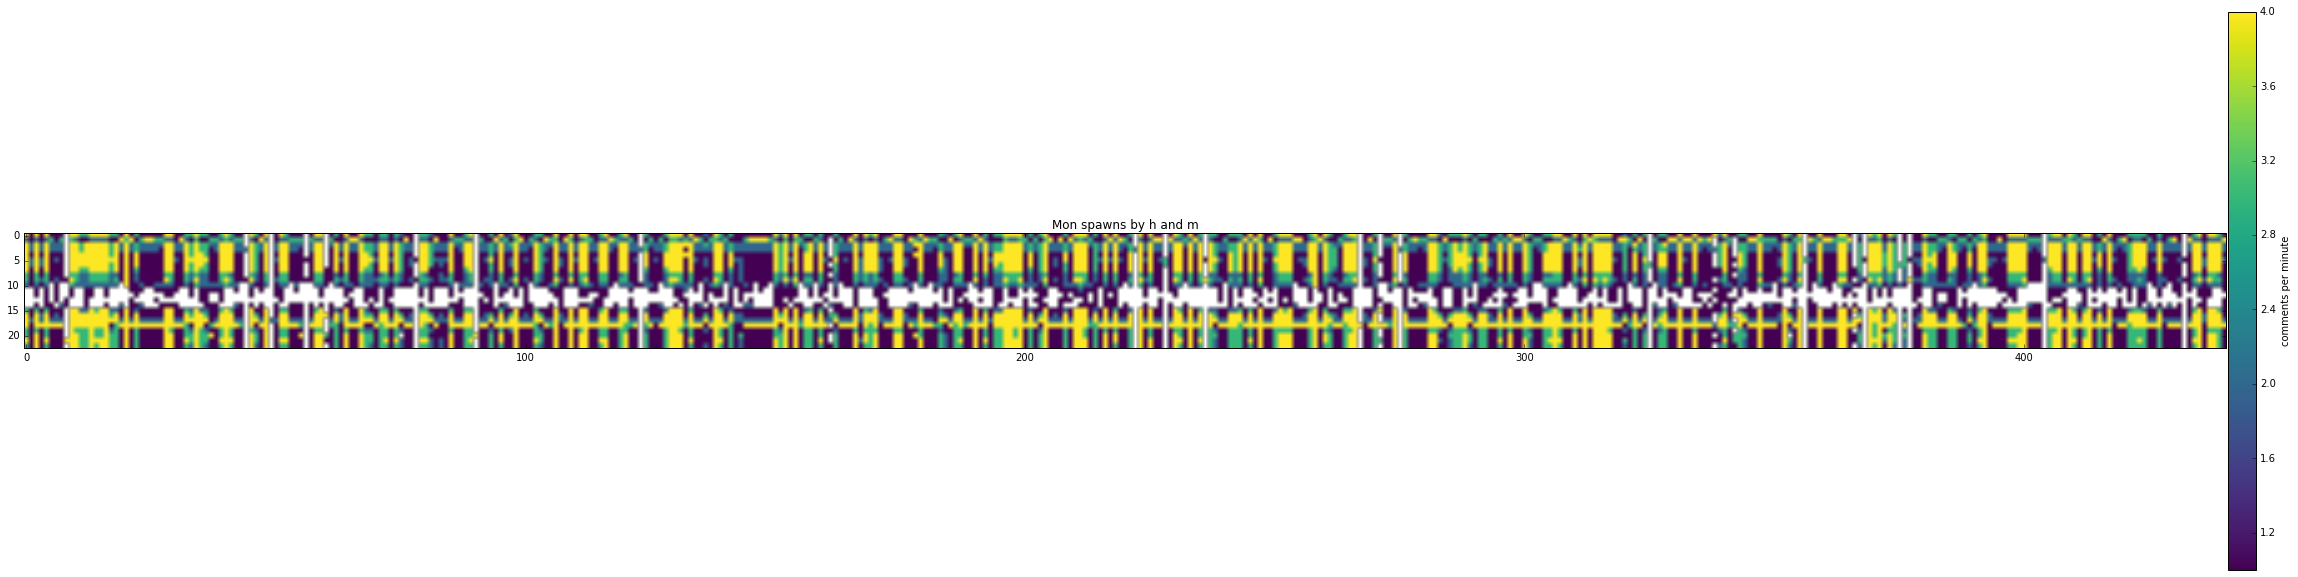

In [43]:
pivoted=df2.pivot('hour', 'hourstamp', 'c_hour_min').clip(0,df2.c_hour_min.quantile(0.9))
fig, ax = plt.subplots(figsize=(40,40))
#ax.grid(False)
plt.imshow(pivoted, origin='upper').set_cmap('viridis')
ax.set_title('Mon spawns by h and m')
plt.colorbar(fraction=0.0125, pad=0.001, label='comments per minute')
plt.show()

In [199]:
df3 = df.copy()

In [200]:
df3['pointcount'] = df3.groupby('lat')['lng'].transform(pd.Series.value_counts)

In [201]:
def offset_vals(x):
    lat_filter = df3['lat'] == x.lat
    located_vals = df3[lat_filter][df3[lat_filter]['lng'] == x.lng]
    df3[lat_filter][df3[lat_filter]['lng'] == x.lng]['d_timestamp'] = located_vals['timestamp'] - located_vals['timestamp'].shift(1)
    return located_vals['timestamp'] - located_vals['timestamp'].shift(1)

for index, row in df3.drop_duplicates(('lat','lng')).iterrows():
    offset_vals(row)

#df3
#df.loc[df['line_race'] == 0, 'rating'] = 0

#df3[df3.groupby('lat')['lng'].transform(sum) < -1]

In [212]:
df3.loc[-1, 'd_timestamp'] = 3


In [283]:
all_spawns = []
for index, row in df3.drop_duplicates(('lat','lng')).iterrows():
    try:
        single_spawn = df3.query("lat == " + '{0:.16f}'.format(row.lat) + " and lng == " +  '{0:.16f}'.format(row.lng)).sort_values(by=['timestamp']).drop_duplicates(('timestamp',))
    except:
        print row.lat
        print row.lng
    #single_spawn = df3.sort_values(by=['timestamp'])
    last_index = 0
    for sindex, srow in single_spawn.iterrows():
        if last_index == 0: 
            last_index = sindex
            continue
        single_spawn_row = single_spawn.loc[sindex]
        single_spawn_row_before = single_spawn.loc[last_index]
        if single_spawn_row['mon'] == single_spawn_row_before['mon']:
            single_spawn.loc[single_spawn_row.name, 'timestamp'] = single_spawn_row_before['timestamp']
        last_index = sindex
    single_spawn = single_spawn.drop_duplicates(('timestamp',))
    last_index = 0
    for sindex, srow in single_spawn.iterrows():
        if last_index == 0: 
            last_index = sindex
            continue
        single_spawn_row = single_spawn.loc[sindex]
        single_spawn_row_before = single_spawn.loc[last_index]
        single_spawn.loc[single_spawn_row.name, 'd_timestamp'] = single_spawn_row['timestamp'] - single_spawn_row_before['timestamp']
        last_index = sindex
    #single_spawn = single_spawn.query("d_timestamp") # values less than 60min * 60sec * 100ms
    single_spawn['d_timestamp'] = single_spawn['d_timestamp'] / 100 / 60 # / microseconds  / seconds (to minutes)
    all_spawns.append(single_spawn.copy())
result_spawns = pd.concat(all_spawns)
    #single_spawn = single_spawn.query("d_timestamp <1") # values less than 60min * 60sec * 100ms

nan
nan


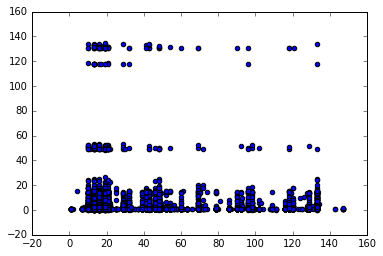

In [284]:
fig, ax = plt.subplots()
#plt.scatter(x, y, s=area, c=colors, alpha=0.5)
ax.scatter(result_spawns['mon'], result_spawns['d_timestamp'])
plt.show()

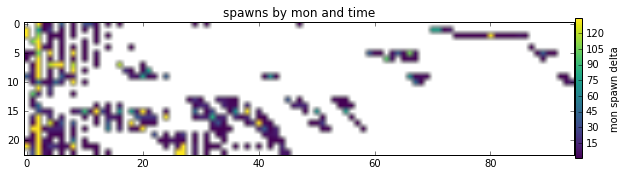

In [289]:

df2 = result_spawns.copy()
df2['c_time_count'] = df2.drop_duplicates().groupby('hour')['d_timestamp'].transform(pd.Series.value_counts)
df2 = df2.drop_duplicates(('hour', 'd_timestamp'))
pivoted=df2.pivot('hour', 'd_timestamp', 'c_time_count').clip(0,df2.c_time_count.quantile(0.9))
fig, ax = plt.subplots(figsize=(10,10))
#ax.grid(False)
plt.imshow(pivoted, origin='upper').set_cmap('viridis')
ax.set_title('spawns by mon and time')
plt.colorbar(fraction=0.0125, pad=0.001, label='mon spawn delta')
plt.show()

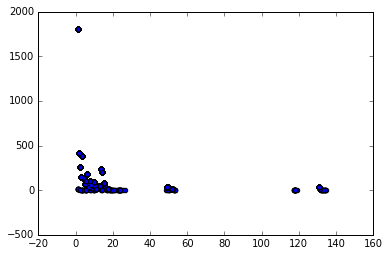

In [285]:
df2 = result_spawns.copy().query("d_timestamp > 1")
df2['c_time_count'] = df2.drop_duplicates().groupby('d_timestamp')['d_timestamp'].transform(pd.Series.value_counts)
fig, ax = plt.subplots()
#plt.scatter(x, y, s=area, c=colors, alpha=0.5)
ax.scatter(df2['d_timestamp'], df2['c_time_count'])
plt.show()